In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import postprocess as pp
# import plots
import os

postproc


In [3]:

def l2_norm(components):
    """
    Compute the L2 norm of a vector field defined by components on their respective domains.

    Parameters:
        components (list): List of tuples (x, f) where x is the mesh coordinates and f is the field values.

    Returns:
        float: L2 norm of the vector field.
    """
    norms = []

    for x, f in components:
        # Compute the square of the field values
        squared_values = f**2

        # Compute the integral using the trapezoidal rule
        integral = np.trapz(squared_values, x)

        # Take the square root to get the L2 norm
        component_norm = np.sqrt(integral)
        norms.append(component_norm)

    # Compute the vector norm by summing the squared norms and taking the square root
    vector_norm = np.sqrt(np.sum(np.array(norms)**2))

    return vector_norm

In [29]:
experiment = '../../test/output/rayleigh-benchmark/MPI-1/bef047fb68f6bc3b5feb6b2f634b15fc'
experiment = '../../test/output/rayleigh-benchmark/MPI-1/ff9c4acbaf25a77cb9e99342154bed50'

params, data, signature = pp.load_data(experiment)


File 'time_data.json' not found. Handle this case accordingly.


In [30]:
modes_data = np.load(os.path.join(experiment, 'mode_shapes_data.npz'), allow_pickle=True)


In [31]:
mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=10)


## Rayleigh benchmark

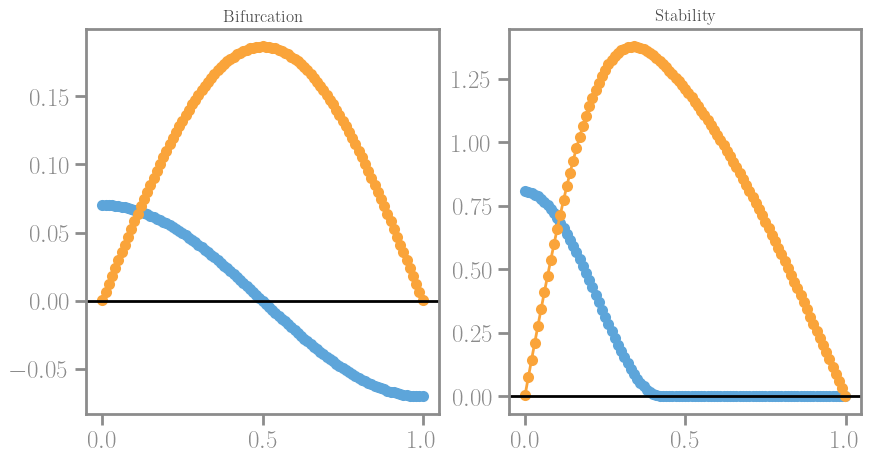

In [32]:
_fig, _axes = pp.plot_fields_for_time_step(mode)

File 'time_data.json' not found. Handle this case accordingly.
case 2
[{x, A}, {x, A}]
sqrt(2*A**2/pi**2 + A**2/2) True False
depends_on_A
case 2
sqrt(0.184201574932019*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.184201574932019*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.736806299728077*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.184201574932019*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.368403149864039*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


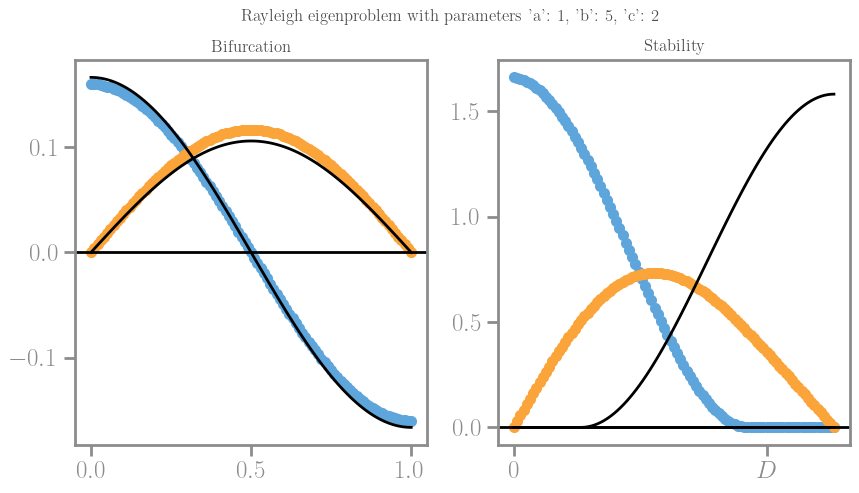

In [59]:
experiment = '../../test/output/rayleigh-benchmark/MPI-1/2f6fb02e066c6e61b2680447a53b61df'
modes_data = np.load(os.path.join(experiment, 'mode_shapes_data.npz'), allow_pickle=True)
mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=10)

params, data, signature = pp.load_data(experiment)

a = params['model']['a']
b = params['model']['b']
c = params['model']['c']

parameters = {"a": a, "b": b, "c": c}

plot_profile_comparison(parameters, mode, idx=[1, 0])

## Parametric Rayleigh benchmark

In [70]:
import os
cwd = os.getcwd()
path_components = cwd.split(os.path.sep)
path_components = path_components[0:-2]
dirroot =  '/' + os.path.join(*path_components, 'test', 'output', 'rayleigh-benchmark-parametric', 'MPI-1')

!ls $dirroot


09076beeea49a74b65d644c11839a44e 7afebd331ee98a64b791b63fbc8ad472
0f67f4193a71a9bf6c675fbfbcf1d20d 8bfe52ddf33e78f00dcf06fd64c8e224
10eeb7e510f7d9acd9dd9308d181efeb ae5552e2d6ee5b4e1c893e54afd34fd3
2e3199d4d028afc46d07481cccc20842 c1a4dc86c067d904f18a359e5a9e9872
3c8264e098e3d65e4644010f2f4579d9 c2b5b729950d97a148bbee24b2dbcd31
4a6cabbcba72ee55b02ddea270cb7b19 e677ff5ecbcf45d08d72b1216ae8ac3c
551c5c9da4307fe423c017ad884fe6a2 fbbafee8a0d2b4b091b87b6ecd796e34
7597f526ad2930b5e9fb98c1888985a9


In [71]:
for subdir, dirs, files in os.walk(dirroot):
    if not os.path.isfile(subdir + "/signature.md5"):
        continue
    print(subdir)
    modes_data = np.load(os.path.join(subdir, 'mode_shapes_data.npz'), allow_pickle=True)
    mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=-1)
    params, data, signature = pp.load_data(subdir)

    # params, data, signature = pp.load_data(subdir)
    # cone_data = data["solver_KS_data"][[isinstance(d["iterations"], int) for d in data["solver_KS_data"]]]
    # _offset = sum([not isinstance(d["iterations"], int) for d in data["solver_KS_data"]])

    # _ell = params['model']['ell']
    # print(f" scaling = {params['stability']['cone']['scaling']}")
    # pd.DataFrame(cone_data)
    # for entry in cone_data:
        # plt.plot(entry["lambda_0"])


/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark-parametric/MPI-1/7597f526ad2930b5e9fb98c1888985a9
File 'time_data.json' not found. Handle this case accordingly.
/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark-parametric/MPI-1/09076beeea49a74b65d644c11839a44e
File 'time_data.json' not found. Handle this case accordingly.
/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark-parametric/MPI-1/ae5552e2d6ee5b4e1c893e54afd34fd3
File 'time_data.json' not found. Handle this case accordingly.
/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark-parametric/MPI-1/4a6cabbcba72ee55b02ddea270cb7b19
File 'time_data.json' not found. Handle this case accordingly.
/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark-parametric/MPI-1/10eeb7e510f7d9acd9dd9308d181efeb
File 'time_data.json' not found. Handle this case accordingly.
/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayl

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark-parametric/MPI-1/6d4ce0926719f298a6e81a82f63ae0e9/mode_shapes_data.npz'

In [4]:
import numpy as np

# Example usage
mesh_coordinates = np.linspace(0, 1, 100)  # Adjust the number of points as needed
field_values = np.sin(np.pi * mesh_coordinates)  # Replace with your field values
field_values = np.sin(np.sin(np.pi * mesh_coordinates))  # Replace with your field values
# field_values = np.ones(len(mesh_coordinates))  # Replace with your field values
result = l2_norm([(mesh_coordinates, field_values)])
print(result)


0.6229402944338904


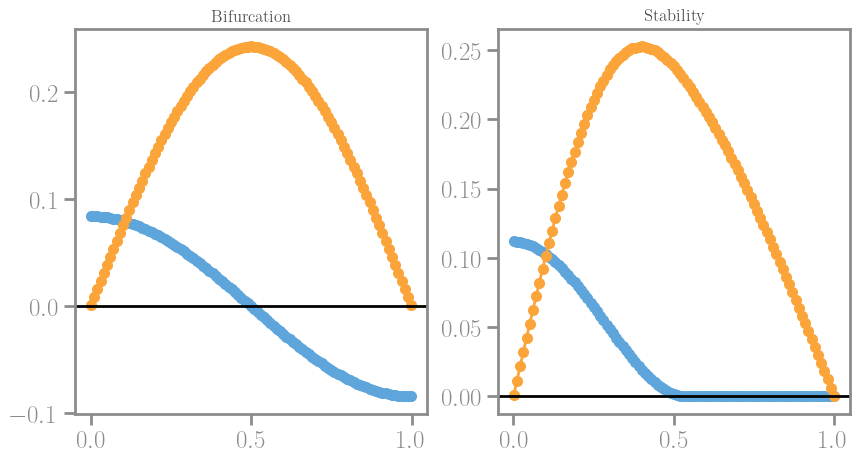

In [27]:
mode = pp.read_mode_data_from_npz(modes_data, time_step=0, num_modes=1, num_points=10)
_fig, _axes = pp.plot_fields_for_time_step(mode)

In [28]:
l2_norm([
    (mode['mesh'], mode['fields']['bifurcation_v']),
    (mode['mesh'], mode['fields']['bifurcation_β'])
    ])

0.18171983239793219

In [29]:
max(mode['fields']['bifurcation_v'])

0.2430757059374186

In [30]:
params

{'geometry': {'Lx': 1.0,
  'Ly': 0.1,
  'N': 10,
  'geom_type': 'infinite-dimensional-unit-test',
  'geometric_dimension': 2,
  'lc': 0.02,
  'mesh_size_factor': 4},
 'loading': {'max': 1.001, 'min': 0, 'steps': 10},
 'model': {'a': 1, 'b': 1, 'c': 8, 'model_dimension': 1, 'model_type': '1D'},
 'solvers': {'damage': {'prefix': 'damage',
   'snes': {'ksp_type': 'preonly',
    'pc_factor_mat_solver_type': 'mumps',
    'pc_type': 'lu',
    'snes_atol': 1e-08,
    'snes_linesearch_type': 'basic',
    'snes_max_it': 50,
    'snes_monitor': '',
    'snes_rtol': 1e-08,
    'snes_type': 'vinewtonrsls'},
   'tao': {'ksp_rtol': '1e-6',
    'pc_type': 'lu',
    'tao_catol': 0.0,
    'tao_crtol': 0.0,
    'tao_gatol': 1e-08,
    'tao_gpcg_maxpgits': 50,
    'tao_grtol': 1e-08,
    'tao_gttol': 1e-08,
    'tao_ls_ftol': '1e-5',
    'tao_ls_gtol': '1e-5',
    'tao_ls_rtol': '1e-5',
    'tao_ls_stepmax': '1e6',
    'tao_ls_stepmin': '1e-8',
    'tao_max_it': 100,
    'tao_monitor': '',
    'tao_stept

## From the book of the numbers...

In [23]:
import eigenspace as eig

In [24]:
eigenspace_v, _normalisation_v = eig.solve_eigenspace_vector(parameters)
eigenspace_k, _normalisation_k = eig.solve_eigenspace_cone(parameters)


case 2
[{x, A}, {x, A}]
sqrt(A**2/2 + 32*A**2/pi**2) True False
depends_on_A
case 2
sqrt(0.125*sin(1.0*pi**1.0)*cos(1.0*pi**1.0)/pi**0.333333333333333 + 0.125*pi**0.666666666666667*sin(1.0*pi**1.0)**2 + 0.5*sin(1.0*pi**1.0)/pi**0.333333333333333 + 0.125*pi**0.666666666666667*cos(1.0*pi**1.0)**2 + 0.25*pi**0.666666666666667)*sqrt(C**2)
depends_on_C


In [25]:
eigenspace_v, _normalisation_v

({'v': -8*sqrt(2)*sin(pi*x)/sqrt(pi**2 + 64),
  'β': -sqrt(2)*pi*cos(pi*x)/sqrt(pi**2 + 64),
  'D': 0},
 {A: -sqrt(2)*pi/sqrt(pi**2 + 64)})

In [26]:
eigenspace_k, _normalisation_k

({'v': 0,
  'β': Piecewise((1.11498170631978*cos(4.0*pi**0.333333333333333*x) + 1.11498170631978, (x >= 0) & (x <= 0.25*pi**0.666666666666667)), (0, True)),
  'D': 0.25*pi**0.666666666666667},
 {C: 1.11498170631978})

In [37]:

def solve_eigenspace_vector(parameters, idx = 0):
    """
    Solve for the eigenspace in a vector space.

    Parameters:
        parameters (dict): A dictionary containing the values for 'a', 'b', and 'c'.
        idx (int): Index to choose the appropriate solution in case of multiple solutions.

    Returns:
        dict: A dictionary containing 'v', 'β', and 'D'.
    """
    x = sp.symbols('x', real=True)
    v = sp.Function('v', real=True)(x)
    β = sp.Function('β', real=True)(x)
    C, A = sp.symbols('C A')
    
    a = parameters["a"]
    b = parameters["b"]
    c = parameters["c"]    
    
    if b * c**2 < sp.pi**2 * a:
        print('case 1')
        _subs = {A: 0}
        A = 0
    elif b * c**2 > sp.pi**2 * a:
        print('case 2')
        _subs = {C: 0}
        C = 0
    
    
    β = C + A*sp.cos(sp.pi * x)
    v = c * A / sp.pi * sp.sin(sp.pi * x)

    depends_on_A = np.any([sp.symbols('A') in expression.free_symbols for expression in [v, β]])
    depends_on_C = np.any([sp.symbols('C') in expression.free_symbols for expression in [v, β]])
    
    _norm = sp.sqrt(np.sum([sp.integrate(eigenfunction**2, (x, 0, 1)) for eigenfunction in (v, β)]))

    print([expression.free_symbols for expression in [v, β]])
    print(_norm, depends_on_A, depends_on_C)
    
    if depends_on_A:
        print('depends_on_A')
        _normalise = [{sp.symbols('A'): ay} for ay in sp.solve(_norm - 1, A)]
    elif depends_on_C:
        print('depends_on_C')
        _normalise = [{sp.symbols('C'): cy} for cy in sp.solve(_norm - 1, C)]
        
    return {"v": v.subs(_normalise[idx]), "β": β.subs(_normalise[idx]), "D": 0}, _normalise[idx]


In [35]:
coeff_k

0.32496666957426423

In [57]:
def plot_profile_comparison(parameters, mode, idx=[1, 1], reverse = False):

    _fig, _axes = pp.plot_fields_for_time_step(mode)
    _fig.suptitle(f"Rayleigh eigenproblem with parameters {parameters}")

    coeff_v = l2_norm([
        (mode['mesh'], mode['fields']['bifurcation_v']),
        (mode['mesh'], mode['fields']['bifurcation_β'])
        ])

    coeff_k = l2_norm([
        # (mode['mesh'], mode['fields']['stability_v']),
        (mode['mesh'], mode['fields']['stability_β'])
        ])

    eigenspace_v, _normalisation_v = eig.solve_eigenspace_vector(parameters, idx=idx[0])
    eigenspace_k, _normalisation_k = eig.solve_eigenspace_cone(parameters, idx=idx[1])

    v, β = eigenspace_v["v"], eigenspace_v["β"]

    x_values = np.linspace(0, 1, 100)
    v_function = sp.lambdify('x', v)
    β_function = sp.lambdify('x', β)

    v_values = [v_function(x) for x in x_values]
    β_values = [β_function(x) for x in x_values]

    _axes[0].plot(x_values, np.array(β_values)*coeff_v, label=r'$\beta(x)$', c='k')
    _axes[0].plot(x_values, np.array(v_values)*coeff_v, label=r'$v(x)$', c='k')

    v, β = eigenspace_k["v"], eigenspace_k["β"]
    D = eigenspace_k["D"]
    x_values = np.linspace(0, 1, 100)
    v_function = sp.lambdify('x', v)
    β_function = sp.lambdify('x', β)
    v_values = [v_function(x) for x in x_values]
    if reverse:
        β_values = [β_function(1-x) for x in x_values]
    else:
        β_values = [β_function(x) for x in x_values]

    _axes[1].plot(x_values, np.array(β_values)*coeff_k, label=r'$\beta(x)$', c='k')
    _axes[1].plot(x_values, np.array(v_values)*coeff_k, label=r'$v(x)$', c='k')
    _axes[1].set_xticks([0, float(sp.N(D))], [0, "$D$"])



/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_50626/1247390959.py:17: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(a, bc_squared, result, levels=[1], colors='white', linestyles='dashed', label=r'$\mathsf{R}^*= 1$')


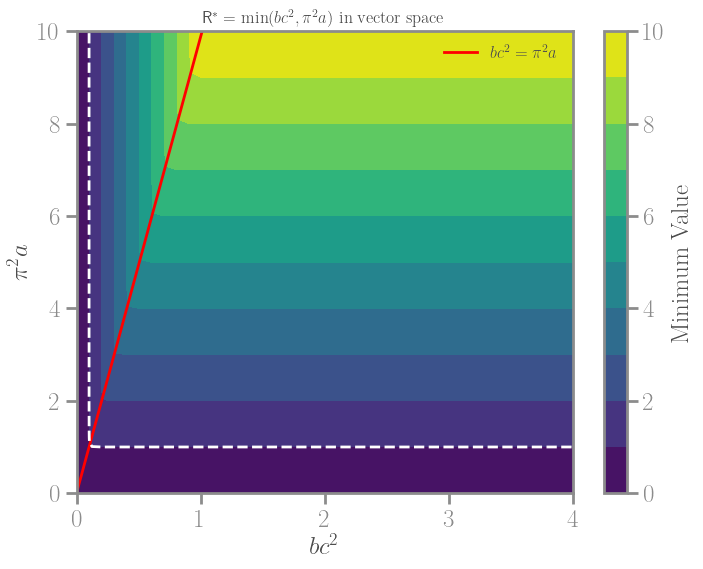

In [94]:

# Define the parameter ranges
bc_squared_values = np.linspace(0, 10, 100)
a_values = np.linspace(0, 10, 100)

# Create a meshgrid for the parameters
bc_squared, a = np.meshgrid(bc_squared_values, a_values)
# a, bc_squared = np.meshgrid(a_values, bc_squared_values)

# Compute the function value for each combination of parameters
result = np.minimum(bc_squared, np.pi**2 * a)

# Create a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(a, bc_squared, result, cmap='viridis', levels=10)
plt.colorbar(contour, label='Minimum Value')
plt.plot(a_values, np.pi**2 * a_values, color='red', label=r'$bc^2 = \pi^2 a$')
plt.contour(a, bc_squared, result, levels=[1], colors='white', linestyles='dashed', label=r'$\mathsf{R}^*= 1$')

plt.ylim([0, 10])
plt.xlim([0, 4])

plt.xlabel(r'$bc^2$')
plt.ylabel(r'$\pi^2 a$')

plt.title(r'$\mathsf{R}^*= \min(bc^2, \pi^2 a)$ in vector space')

plt.legend()
# Show the plot
plt.show()

In [ ]:

# Define the parameter ranges
bc_squared_values = np.linspace(0, 10, 100)
a_values = np.linspace(0, 10, 100)

# Create a meshgrid for the parameters
bc_squared, a = np.meshgrid(bc_squared_values, a_values)
# a, bc_squared = np.meshgrid(a_values, bc_squared_values)

# Compute the function value for each combination of parameters
result = np.minimum(bc_squared, np.pi**2 * a)

# Create a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(a, bc_squared, result, cmap='viridis', levels=10)
plt.colorbar(contour, label='Minimum Value')
plt.plot(a_values, np.pi**2 * a_values, color='red', label=r'$bc^2 = \pi^2 a$')
plt.contour(a, bc_squared, result, levels=[1], colors='white', linestyles='dashed', label=r'$\mathsf{R}^*= 1$')

plt.ylim([0, 10])
plt.xlim([0, 4])

plt.xlabel(r'$bc^2$')
plt.ylabel(r'$\pi^2 a$')

plt.title(r'$\mathsf{R}^*= \min(bc^2, \pi^2 a)$ in vector space')

plt.legend()
# Show the plot
plt.show()

## Phase space computations


In [10]:
import os
cwd = os.getcwd()
path_components = cwd.split(os.path.sep)
path_components = path_components[0:-2]
dirroot =  '/' + os.path.join(*path_components, 'test', 'output', 'rayleigh-benchmark', 'MPI-1')

!ls $dirroot


1886c43ceb7f7b33293e7718baadb80f 77a89ece3426e790a56e6940e78cf1a7
26bbaa4b0607bbe85afb0a9daf9e6b4d 8fe224a5e96c0d9085c9cba0471be443
2b8cc196b9e91bd99b8bd6d1cd601a41 a34f942db5e46624e9ea3eefa3e0e85c
35dc528686badfde6e535184026e2c38 ac534c4c1dbbe6a1207c15d186d48888
3f6ee8d6ea68cadc4693189cd016895a c0dbb31f479bf79ff9eca6507f6df6d5
5799bad12159810af586ca258331254f db96dbfd262ff2e5a5980c74dc9ca846
62a2522ac6885818c04a6a78eae11bfa dbf4f01eb6ee4d83dfc6aa2f5783c662
64fcd459f19718fd498c98901bedd243 e9276db499c49b725dbe8cb8ac8c9521
70df91fae5b5c6004f37eabb3a8916a5


In [64]:
import os
import yaml
import matplotlib.pyplot as plt

def load_parameters(directory):
    parameters_file = os.path.join(directory, 'parameters.yaml')
    if os.path.exists(parameters_file):
        with open(parameters_file, 'r') as f:
            parameters = yaml.safe_load(f)
        return parameters
    else:
        return None
    
def compute_contour(a_values, bc_square_values):
    a, bcsq = np.meshgrid(a_values, bc_square_values)
    D_values = (np.pi**2 * a / bcsq)**(1/3)
    return a, bcsq, D_values

def plot_phase_space(rootdir):
    successful_points = []
    unsuccessful_points = []
    points_count = {}

    for subdir, _, _ in os.walk(rootdir):
        parameters = load_parameters(subdir)
        if parameters is not None:
            a = parameters.get('model', {}).get('a')
            b = parameters.get('model', {}).get('b')
            c = parameters.get('model', {}).get('c')

            # Check if the computation is successful based on the existence of mode_shapes_data.npz
            success_file = os.path.join(subdir, 'mode_shapes_data.npz')
            datapoint = (np.pi**2 * a, b*c**2)
            
            if os.path.exists(success_file):
                successful_points.append(datapoint)
            else:
                unsuccessful_points.append(datapoint)

            points_count[datapoint] = points_count.get(datapoint, 0) + 1

    for datapoint, count in points_count.items():
        # plt.scatter(*datapoint, label=f'Multiplicity: {count}', marker='')
        # plt.scatter(*datapoint, marker='')
        plt.annotate(f'\#{count}', datapoint, textcoords="offset points", xytext=(0, -15), ha='center')

    # Create the plot
    plt.scatter(*zip(*unsuccessful_points), label='Unsuccessful', marker='x')
    plt.scatter(*zip(*successful_points), label='Successful', marker='.', s=200)
    plt.xlabel('$\pi^2 a$')
    plt.ylabel('$bc^2$')
    plt.legend()
    a_values = np.linspace(0, 100, 100)
    bc_sq_values = np.linspace(0, 100, 100)
    a, bc_sq, D_values = compute_contour(a_values, bc_sq_values)
    plt.contour(bc_sq, a , D_values, levels=5, colors='black', linestyles='dashed')

    plt.show()

# Example usage
    plot_phase_space(dirroot)


In [20]:
successful_points = []
unsuccessful_points = []

for subdir, _, _ in os.walk(dirroot):
    parameters = load_parameters(subdir)
    if parameters is not None:
        a = parameters.get('model', {}).get('a')
        b = parameters.get('model', {}).get('b')
        c = parameters.get('model', {}).get('c')
        # Check if the computation is successful based on the existence of mode_shapes_data.npz
        success_file = os.path.join(subdir, 'mode_shapes_data.npz')
        if os.path.exists(success_file):
            successful_points.append((a, b*c**2))
        else:
            unsuccessful_points.append((a, b*c**2))


In [16]:
dirroot

'/Users/kumiori3/Documents/WIP/Nature/mec647/test/output/rayleigh-benchmark/MPI-1'

/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_91885/1220707274.py:7: RuntimeWarning: divide by zero encountered in divide
  return (np.pi**2 * a / (b * c**2))**(1/3)
/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_91885/1220707274.py:7: RuntimeWarning: invalid value encountered in divide
  return (np.pi**2 * a / (b * c**2))**(1/3)


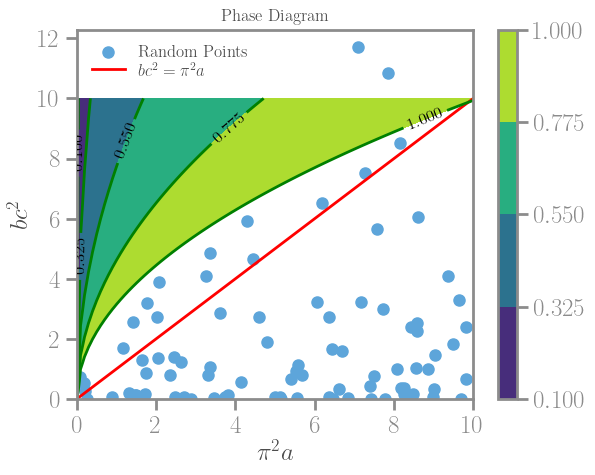

In [112]:
num_points = 100
points = [eig.book_of_the_numbers(scale_c=2, scale_b=3) for _ in range(num_points)]
x_values = [np.pi**2 * point["a"] for point in points]
y_values = [point["b"] * point["c"]**2 for point in points]

def compute_D(a, b, c):
    return (np.pi**2 * a / (b * c**2))**(1/3)

# Create a scatter plot
plt.scatter(x_values, y_values, label='Random Points')
plt.plot(np.linspace(0, 10), np.linspace(0, 10), color='red', label=r'$bc^2 = \pi^2 a$')


# Plot contour lines of the function D
a_values = np.linspace(0, 10, 100)
bc2_values = np.linspace(0, 10, 100)
A, BC2 = np.meshgrid(a_values, bc2_values)
D_values = compute_D(A, 1, BC2)  # Assuming b = 1 for simplicity
contour_lines = plt.contour(A, BC2, D_values, levels=np.linspace(.1, 1, 5), colors='green')
contourf = plt.contourf(A, BC2, D_values, levels=np.linspace(.1, 1, 5))
cbar = plt.colorbar(contourf)

plt.xlabel(r'$\pi^2 a$')
plt.ylabel(r'$b c^2$')
# plt.ylim([-3, 50])
plt.title('Phase Diagram')
plt.legend()


# Add contour labels
contour_labels = plt.clabel(contour_lines, inline=True, fontsize=12, colors='black')

# Add annotations for iso-D values
# for i, txt in enumerate(contour_labels):
    # plt.annotate(f'D={np.around(D_values[0, i], decimals=2)}', (txt.get_position()[0], txt.get_position()[1]))


In [52]:
compute_D(1, 1, 1)

2.1450293971110255

# Phase computation parametric

In [287]:
import os
cwd = os.getcwd()
path_components = cwd.split(os.path.sep)
path_components = path_components[0:-2]
dirroot =  '/' + os.path.join(*path_components, 'test', 'output', 'rayleigh-benchmark-parametric', 'MPI-1')

!ls $dirroot


0044f692a05422bb98c4bd3c6d04770c 7d1d96b15a68e392abeffe502f84a042
00ffda65398984695ae5576fe383f02c 7d21decc9d7b00098894bc65c19ccd48
02bd5bbda8beff8f5cc0fbd88b599173 7d44e0b425e269c22219e93ee416e825
034189f38c18e6c04e59770762ddf137 7ed36b8dcee86d9a4d55b31fdd6f7199
043ebb377c5c5699e4d0c39a6efff1bd 7f1430bcb0a6e3812cc44d0015cc2e19
046c79dade1d3ac0d860737fb091750e 7fd56cac090b0910c9796189bb13f529
04c979b82e2ec3add9a38959f42f52b1 802c675e74c573280a1fb772daaedf9c
06fd589cfddf7421b0f422bd92c4f077 80bf33f54ca3cc39d55895987d22db6a
0709aa4181151c6be88b7bcafc3e014c 81211387b53a1545755003f8b2a1fc18
08024b8d0f056a2e29555bbcff919b96 812f71e51faf4596904b7256abf7468f
08c18d207e645c06bfbac1f997b0edad 818deb373f5d6257aa085493e2a12fb6
0aa3df8dcb703508b12d1c306410ba06 824d7bb2017e24e06fb6a4d7d87994f0
0bd67cc936b53d779e505e7860e8d3a0 840d841d4f4ab073d4675980ae0c65e2
0bd72656f57f527e5863ef191c372831 8498148bb21e28e65acd6e832dd392e5
0ce6d727b36b2329f0bbb7bbcdbedc32 8683c8a249116de1e4a1f2efb7540756
0e5f3c9225

In [318]:
data['global_values']

array({'R_vector': 0.47655103600757487, 'R_cone': 0.4765510360075748, 'D_theory': 1, 'D_support': 1.0},
      dtype=object)

In [319]:
successful_points = []
unsuccessful_points = []
data_for_plotting = []


for subdir, _, _ in os.walk(dirroot):
    parameters = load_parameters(subdir)
    if parameters is not None:
        a = parameters.get('model', {}).get('a')
        b = parameters.get('model', {}).get('b')
        c = parameters.get('model', {}).get('c')
    #     # Check if the computation is successful based on the existence of mode_shapes_data.npz
        success_file = os.path.join(subdir, 'mode_shapes_data.npz')
        if os.path.exists(success_file):
            successful_points.append((a, b*c**2))
            data = np.load(os.path.join(subdir, 'mode_shapes_data.npz'), allow_pickle=True)
            D_support = data['global_values'].item()['D_support']
            D_theory = data['global_values'].item()['D_theory']
            R_vector = data['global_values'].item()['R_vector']
            R_cone = data['global_values'].item()['R_cone']
            
            # Append data for plotting
            data_for_plotting.append({'pisq_a': np.pi**2*a, 'bc_squared': b*c**2, 'D_support': D_support, 'D_theory': D_theory, 
                                      'R_vector': R_vector, 'R_cone': R_cone})
            
        else:
            unsuccessful_points.append((a, b*c**2))
            data = []

In [289]:
D_theory_values = [point['D_theory'] for point in data_for_plotting]
D_support_values = [point['D_support'] for point in data_for_plotting]


/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_91885/1541847198.py:3: RuntimeWarning: divide by zero encountered in divide
  return (x / y)**(1/3)
/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_91885/1541847198.py:3: RuntimeWarning: invalid value encountered in divide
  return (x / y)**(1/3)


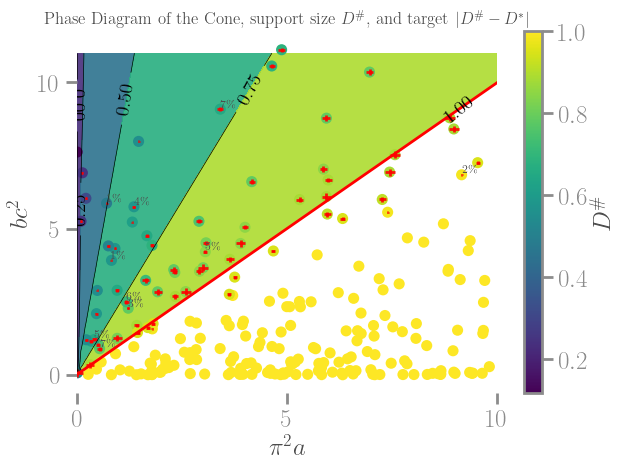

In [317]:
# Define the function
def func(x, y):
    return (x / y)**(1/3)

# Create a meshgrid
x = np.linspace(0, 10, 100)
y = np.linspace(0, 11, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values on the meshgrid
Z = func(X, Y)
plt.contourf(X, Y, Z, cmap='viridis', levels=np.linspace(0, 1, 5), alpha=.9)

D_theory_values = [point['D_theory'] for point in data_for_plotting]
D_support_values = [point['D_support'] for point in data_for_plotting]

x_values, y_values = zip(*[(point['pisq_a'], point['bc_squared']) for point in data_for_plotting])

# Create a scatter plot and color the points based on D_theory
scatter = plt.scatter(x_values, y_values, c=D_support_values, cmap='viridis', edgecolors='black', linewidths=.0, label='Data')

error_values = [np.abs(float((point['D_support']-point['D_theory']))) for point in data_for_plotting]
plt.errorbar(x_values, y_values, xerr=np.abs(error_values), yerr=np.abs(error_values), fmt='none', ecolor='red', alpha=0.9)
# Add a colorbar to the plot
cbar = plt.colorbar(scatter)
cbar.set_label('$D^\#$')
contour_lines = plt.contour(X, Y, Z, levels=np.linspace(0, 1, 5), colors='black', alpha=1, linestyles='solid', linewidths = .5)


for i, (x, y, error) in enumerate(zip(x_values, y_values, error_values)):
    if i % 5 == 0 and error !=0:  # Display error for every n-th point
        plt.text(x, y, f'{error*100:.0f}\%', fontsize=8, ha='left', va='bottom')

plt.plot(np.linspace(0, 10), np.linspace(0, 10), color='red', label=r'$bc^2 = \pi^2 a$')

# manual_labels = {1.0: "$\pi^2 a = bc^2$"}  # Add labels for specific contour levels

contour_labels = plt.clabel(contour_lines, inline=True, fontsize=14, colors='black',
                            inline_spacing=10)
                            # fmt=lambda x: manual_labels.get(x, str(x)))

# Customize the spines
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

plt.xlim(0, 10)  # Replace with your desired limits
# plt.ylim(0, 10)  # Replace with your desired limits

# Set custom ticks
plt.xticks(np.linspace(0, 10, 3))  # Replace with your desired tick positions
plt.yticks(np.linspace(0, 10, 3))  # Replace with your desired tick positions

# plt.legend()
# Customize the plot
plt.xlabel('$\pi^2a$')
plt.ylabel('$bc^2$')
plt.title('Phase Diagram of the Cone, support size $D^\#$, and target $|D^\#-D^*|$')
# plt.show()
plt.tight_layout()
plt.savefig('../../test/output/rayleigh-benchmark-parametric/phase_diagram.pdf', dpi=300)
plt.savefig('../../test/output/rayleigh-benchmark-parametric/phase_diagram.png', dpi=300)

In [362]:
min(error_values)

1.0911423369388325e-15

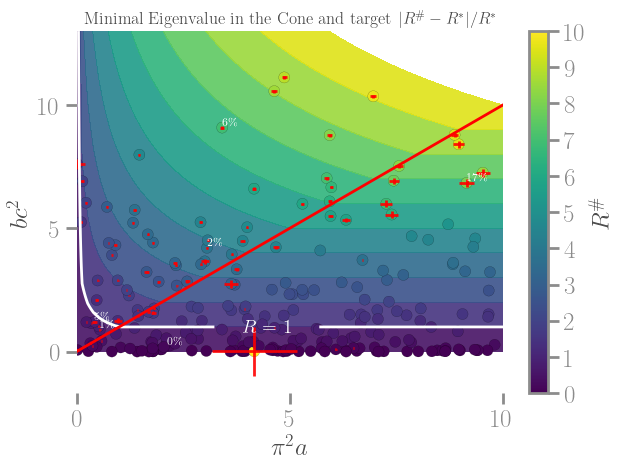

In [417]:
# Define the function
def func(x, y):
    # if y < x:
    #     return y
    # return (x)**(1/3)*(y)**(2/3)
    return np.where(y < x, y, (x**(1/3)) * (y**(2/3)))
    # return np.where(y < x, y, x)

# Create a meshgrid
x = np.linspace(0, 13, 100)
y = np.linspace(0, 13, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values on the meshgrid
Z = func(X, Y)
fig, ax = plt.subplots()

plt.contourf(X, Y, Z, cmap='viridis', levels=np.linspace(0, 10, 11), alpha=.9)

R_cone_values = [point['R_cone'] for point in data_for_plotting]

x_values, y_values = zip(*[(point['pisq_a'], point['bc_squared']) for point in data_for_plotting])

# Create a scatter plot and color the points based on D_theory
scatter = plt.scatter(x_values, y_values, c=R_cone_values, cmap='viridis', edgecolors='black', linewidths=.1, label='Data')

error_values = np.clip(np.abs([(point['R_cone'] - func(point['pisq_a'], point['bc_squared']).item())/func(point['pisq_a'], point['bc_squared']).item() for point in data_for_plotting]), 
                       0, 1)
plt.errorbar(x_values, y_values, xerr=np.abs(error_values), yerr=np.abs(error_values), fmt='none', ecolor='red', alpha=0.9)
# Add a colorbar to the plot
cbar = plt.colorbar(scatter, ticks=np.linspace(0, 10, 11))
scatter.colorbar.mappable.set_clim(0, 10)

cbar.set_label('$R^\#$')
contour_lines = plt.contour(X, Y, Z, levels=[1], colors='white', alpha=1, linestyles='solid', linewidths = 2)

plt.plot(np.linspace(0, 10), np.linspace(0, 10), color='red', label=r'$bc^2 = \pi^2 a$')

# # manual_labels = {1.0: "$\pi^2 a = bc^2$"}  # Add labels for specific contour levels

contour_labels = plt.clabel(contour_lines, inline=True, fontsize=14, colors='white',
                            inline_spacing=10, fmt=lambda x: f"$R =$ {x:.0f}")
#                             # fmt=lambda x: manual_labels.get(x, str(x)))

for i, (x, y, error) in enumerate(zip(x_values, y_values, error_values)):
    if i % 10 == 0 and error > 1e-3:  # Display error for every n-th point
        plt.text(x, y, f'{error*100:.0f}\%', fontsize=8, ha='left', va='bottom', color='white')

# Customize the spines
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

plt.xlim(0, 10)  # Replace with your desired limits
# plt.ylim(0, 10)  # Replace with your desired limits

# Set custom ticks
plt.xticks(np.linspace(0, 10, 3))  # Replace with your desired tick positions
plt.yticks(np.linspace(0, 10, 3))  # Replace with your desired tick positions
# plt.gca().dist = 105
# plt.subplots_adjust(bottom=1)
# ax.margins(0.05)
# plt.legend()
# Customize the plot
plt.xlabel('$\pi^2a$')
plt.ylabel('$bc^2$')
plt.title('Minimal Eigenvalue in the Cone and target $|R^\#-R^*|/R^*$')
# plt.show()
plt.tight_layout()
# plt.savefig('../../test/output/rayleigh-benchmark-parametric/phase_diagram_R_cone.pdf', dpi=300)
# plt.savefig('../../test/output/rayleigh-benchmark-parametric/phase_diagram_R_cone.png', dpi=300)

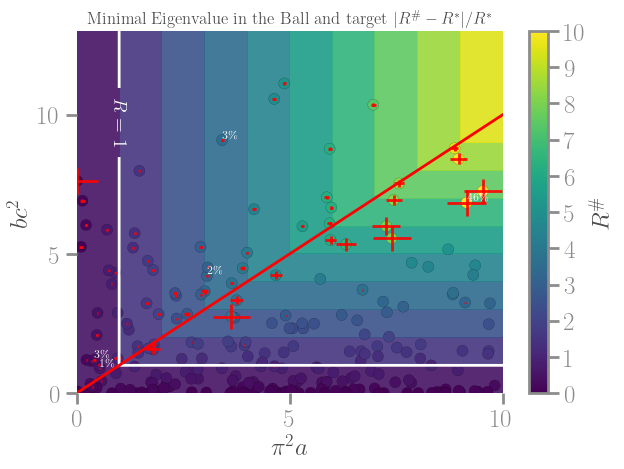

In [413]:
# Define the function
def func(x, y):
    return np.where(y < x, y, x)

# Create a meshgrid
x = np.linspace(0, 13, 100)
y = np.linspace(0, 13, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values on the meshgrid
Z = func(X, Y)
plt.contourf(X, Y, Z, cmap='viridis', levels=np.linspace(0, 10, 11), alpha=.9)

R_vector_values = [point['R_vector'] for point in data_for_plotting]

x_values, y_values = zip(*[(point['pisq_a'], point['bc_squared']) for point in data_for_plotting])

# Create a scatter plot and color the points based on D_theory
scatter = plt.scatter(x_values, y_values, c=R_vector_values, cmap='viridis', edgecolors='black', linewidths=.1, label='Data')

error_values = np.clip(np.abs([(point['R_vector'] - func(point['pisq_a'], point['bc_squared']).item())/func(point['pisq_a'], point['bc_squared']).item() for point in data_for_plotting]), 0, 3)
plt.errorbar(x_values, y_values, xerr=np.abs(error_values), yerr=np.abs(error_values), fmt='none', ecolor='red', alpha=0.9)
# Add a colorbar to the plot
cbar = plt.colorbar(scatter, ticks=np.linspace(0, 10, 11))
scatter.colorbar.mappable.set_clim(0, 10)

cbar.set_label('$R^\#$')
contour_lines = plt.contour(X, Y, Z, levels=[1], colors='white', alpha=1, linestyles='solid', linewidths = 2)

for i, (x, y, error) in enumerate(zip(x_values, y_values, error_values)):
    if i % 10 == 0 and error > 1e-3:  # Display error for every n-th point
        plt.text(x, y, f'{error*100:.0f}\%', fontsize=8, ha='left', va='bottom', color='white')

plt.plot(np.linspace(0, 10), np.linspace(0, 10), color='red', label=r'$bc^2 = \pi^2 a$')

# # manual_labels = {1.0: "$\pi^2 a = bc^2$"}  # Add labels for specific contour levels

contour_labels = plt.clabel(contour_lines, inline=True, fontsize=14, colors='white',
                            inline_spacing=10, fmt=lambda x: f"$R =$ {x:.0f}")
#                             # fmt=lambda x: manual_labels.get(x, str(x)))

# Customize the spines
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

plt.xlim(0, 10)  # Replace with your desired limits
# plt.ylim(0, 10)  # Replace with your desired limits

# Set custom ticks
plt.xticks(np.linspace(0, 10, 3))  # Replace with your desired tick positions
plt.yticks(np.linspace(0, 10, 3))  # Replace with your desired tick positions

# plt.legend()
# Customize the plot
plt.xlabel('$\pi^2a$')
plt.ylabel('$bc^2$')
plt.title('Minimal Eigenvalue in the Ball and target $|R^\#-R^*|/R^*$')
# plt.show()
plt.tight_layout()
plt.savefig('../../test/output/rayleigh-benchmark-parametric/phase_diagram_R_ball.pdf', dpi=300)
plt.savefig('../../test/output/rayleigh-benchmark-parametric/phase_diagram_R_ball.png', dpi=300)

/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_91885/930303367.py:10: RuntimeWarning: divide by zero encountered in divide
  return (np.pi**2 * a / (bcsq))**(1/3)
/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_91885/930303367.py:10: RuntimeWarning: invalid value encountered in divide
  return (np.pi**2 * a / (bcsq))**(1/3)


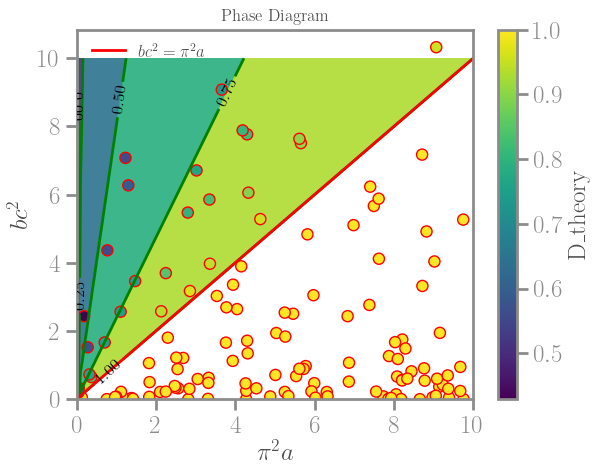

In [161]:
num_points = 100
points = [eig.book_of_the_numbers(scale_c=2, scale_b=3) for _ in range(num_points)]
x_values = [np.pi**2 * point["a"] for point in points]
y_values = [point["b"] * point["c"]**2 for point in points]

# def compute_D(a, b, c):
#     return (np.pi**2 * a / (b * c**2))**(1/3)

def compute_D(a, bcsq):
    return (np.pi**2 * a / (bcsq))**(1/3)

# Create a scatter plot

plt.contourf(X, Y, Z, cmap='viridis', levels=np.linspace(0, 1, 5), alpha=0.9)

# Plot contour lines of the function D
a_values = np.linspace(0, 10, 100)
bc2_values = np.linspace(0, 10, 100)
A, BC2 = np.meshgrid(a_values, bc2_values)
# D_values = compute_D(A, BC2)  # Assuming b = 1 for simplicity


contour_lines = plt.contour(X, Y, Z, levels=np.linspace(0, 1, 5), colors='green')
# contourf = plt.contourf(A, BC2, D_values, levels=np.linspace(0, 1, 5))


# cbar = plt.colorbar(contourf)

plt.plot(np.linspace(0, 10), np.linspace(0, 10), color='red', label=r'$bc^2 = \pi^2 a$')


plt.xlabel(r'$\pi^2 a$')
plt.ylabel(r'$b c^2$')
# plt.ylim([-3, 50])
plt.title('Phase Diagram')
plt.legend()


# plt.scatter(x_values, y_values, label='Random Points',edgecolors='black')
D_theory_values = [point['D_theory'] for point in data_for_plotting]
x_values, y_values = zip(*[(point['pisq_a'], point['bc_squared']) for point in data_for_plotting])

error_values = [float(point['D_support']-point['D_theory']) for point in data_for_plotting]


# Create a scatter plot and color the points based on D_theory
scatter = plt.scatter(x_values, y_values, c=D_theory_values, cmap='viridis', edgecolors='red')

plt.errorbar(x_values, y_values, xerr=error_values, yerr=error_values, fmt='none', ecolor='gray', alpha=0.5)

# Add a colorbar to the plot
cbar = plt.colorbar(scatter)
cbar.set_label('D_theory')



# Add contour labels
contour_labels = plt.clabel(contour_lines, inline=True, fontsize=12, colors='black')

# Add annotations for iso-D values
# for i, txt in enumerate(contour_labels):
    # plt.annotate(f'D={np.around(D_values[0, i], decimals=2)}', (txt.get_position()[0], txt.get_position()[1]))


In [165]:
D_support_values = [point['D_support'] for point in data_for_plotting]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_91885/2951459962.py:3: RuntimeWarning: divide by zero encountered in divide
  return (x / y)**(1/3)
/var/folders/ht/z8sb7wsd1bg0qpmyyfyq2rcm0000gr/T/ipykernel_91885/2951459962.py:3: RuntimeWarning: invalid value encountered in divide
  return (x / y)**(1/3)


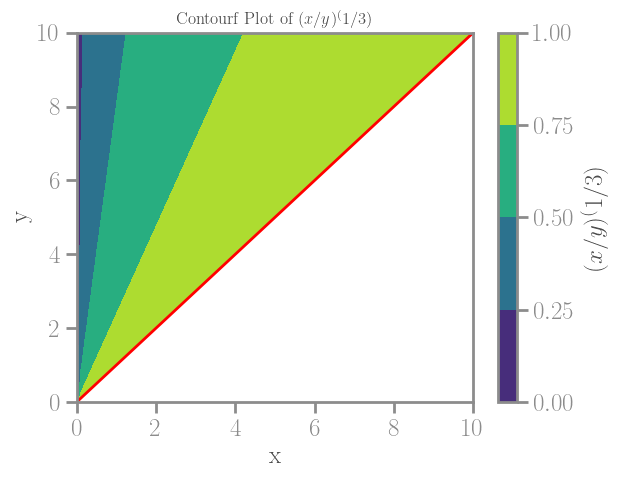

In [148]:
# Define the function
def func(x, y):
    return (x / y)**(1/3)

# Create a meshgrid
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values on the meshgrid
Z = func(X, Y)

# Create a filled contour plot
plt.contourf(X, Y, Z, cmap='viridis', levels=np.linspace(0, 1, 5))
plt.plot(np.linspace(0, 10), np.linspace(0, 10), color='red', label=r'$bc^2 = \pi^2 a$')

# Add a colorbar to the plot
cbar = plt.colorbar()
cbar.set_label('$(x/y)^(1/3)$')

# Customize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contourf Plot of $(x/y)^(1/3)$')
plt.show()
